In [209]:
import pandas as pd
import numpy as np 
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_classification, make_circles
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
import seaborn as sns

# KMeans algorithm

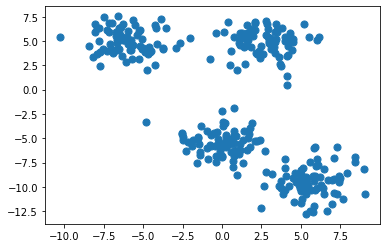

In [210]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

### 2 clusters 

In [211]:
kmeans = KMeans(n_clusters=2, random_state=10, n_jobs=-1).fit(X)

In [212]:
labels = kmeans.labels_
labels

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [213]:
centers = kmeans.cluster_centers_
centers

array([[ 2.94383075, -7.55856199],
       [-1.68187558,  4.89652631]])

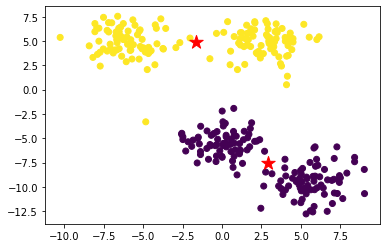

In [214]:
plt.scatter(X[:, 0], X[:, 1], c=labels);
plt.scatter(centers[:, 0], centers[:, 1], marker="*", s=200, c='r');

### 4 clusters 

In [215]:
kmeans = KMeans(n_clusters=4, random_state=10, n_jobs=-1).fit(X)

In [216]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

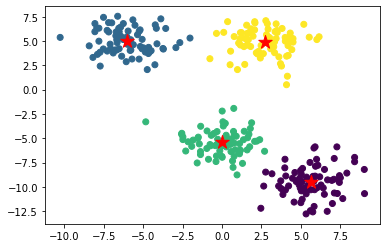

In [217]:
plt.scatter(X[:, 0], X[:, 1], c=labels);
plt.scatter(centers[:, 0], centers[:, 1], marker="*", s=200, c='r');

### 5 clusters 

In [218]:
kmeans = KMeans(n_clusters=5, random_state=10, n_jobs=-1).fit(X)

In [219]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

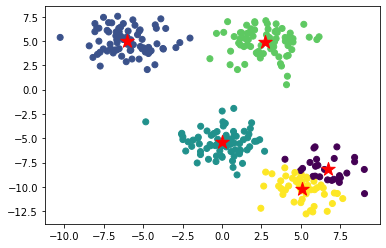

In [220]:
plt.scatter(X[:, 0], X[:, 1], c=labels);
plt.scatter(centers[:, 0], centers[:, 1], marker="*", s=200, c='r');

In [221]:
kmeans.inertia_

1043.6375933531265

# Choose the number of clusters  

In [222]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_jobs=-1).fit(X)
    inertia.append(kmeans.inertia_)

In [223]:
inertia

[19080.349500026125,
 5841.459148406837,
 2988.1666700992337,
 1168.0418508382372,
 1043.6375933531265,
 931.8744729100765,
 827.8218278993625,
 728.8492442791016,
 663.5566808148283,
 599.9841056169793]

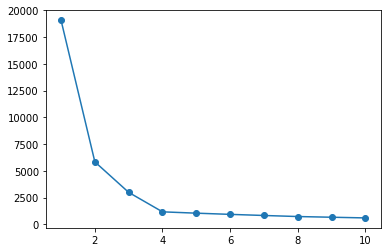

In [224]:
plt.plot(range(1, 11), inertia, marker='o')

На 4 перелом, где находится минимум. Это и будет оптимальное число кластеров.

In [225]:
D = []

for i in range(1, 9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

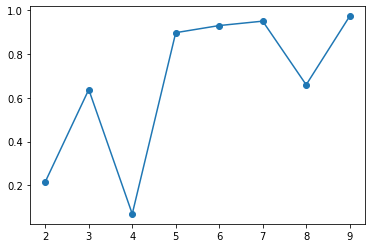

In [226]:
plt.plot(range(2, 10), D, marker='o');

# Different forms for clustering  

In [227]:
def kmeans_clustering(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=-1).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plt.scatter(X[:, 0], X[:, 1], c=labels);
    plt.scatter(centers[:, 0], centers[:, 1], marker="*", s=200, c='r');
    plt.title(str(n_clusters)+' clusters');
    plt.show()

### two moons 

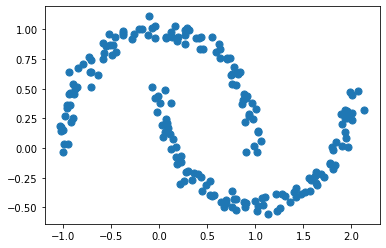

In [228]:
X, y = make_moons(200, noise=0.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

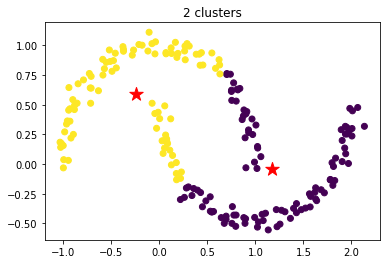

In [229]:
kmeans_clustering(2, X)

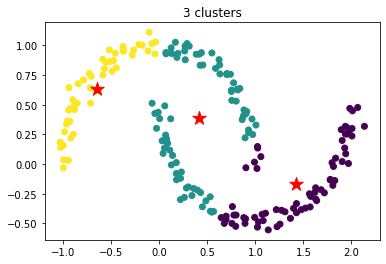

In [230]:
kmeans_clustering(3, X)

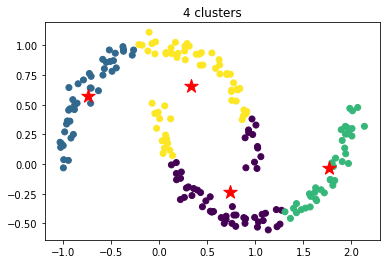

In [231]:
kmeans_clustering(4, X)

### two circles 

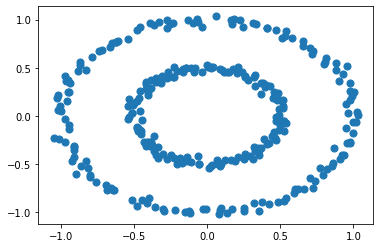

In [232]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

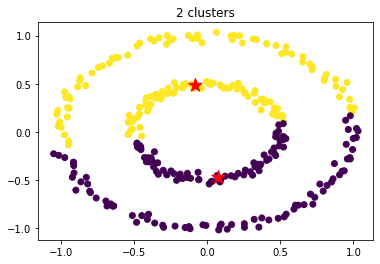

In [233]:
kmeans_clustering(2, X)

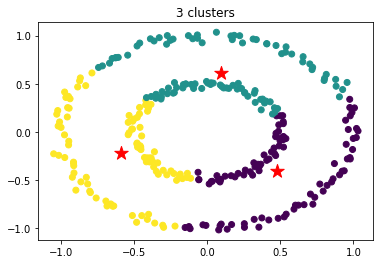

In [234]:
kmeans_clustering(3, X)

### Anisotropicly distributed 

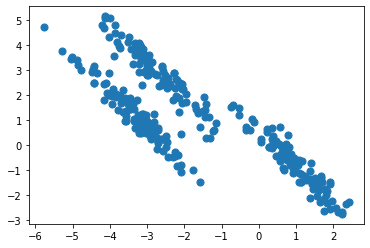

In [235]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.608, -0.637], [-0.409, 0.852]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

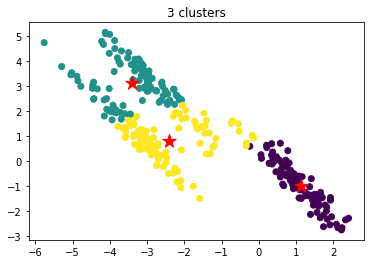

In [236]:
kmeans_clustering(3, X)

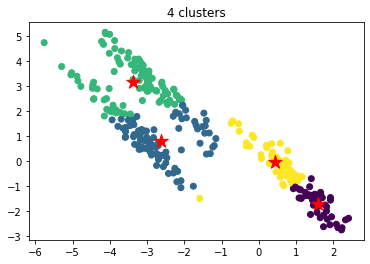

In [237]:
kmeans_clustering(4, X)

# EM algorithm (Gaussian mixture)

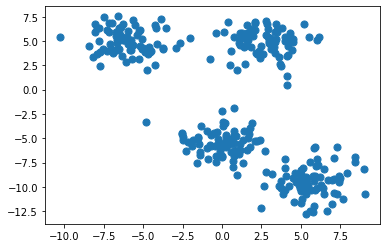

In [238]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [239]:
gauss = GaussianMixture(n_components=2, random_state=10).fit(X)

In [240]:
labels = gauss.predict(X)

In [241]:
labels

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], d

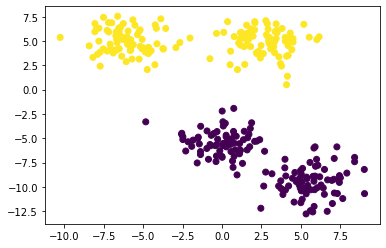

In [242]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

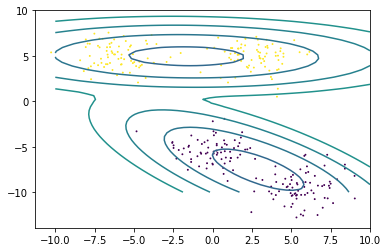

In [243]:
from matplotlib.colors import LogNorm

x = np.linspace(-10., 10.)
y = np.linspace(-10., 10.)
X_, Y_ = np.meshgrid(x, y)
XX = np.array([X_.ravel(), Y_.ravel()]).T
Z_ = -gauss.score_samples(XX)
Z = Z_.reshape(X_.shape)

CS = plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 1, 10))
plt.scatter(X[:, 0], X[:, 1], 0.8, c=labels);


In [244]:
gauss = GaussianMixture(n_components=3, random_state=10).fit(X)

In [245]:
labels = gauss.predict(X)

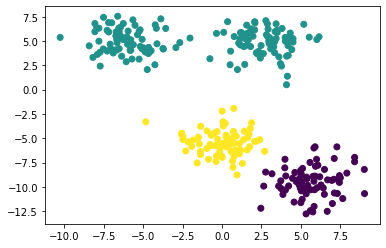

In [246]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

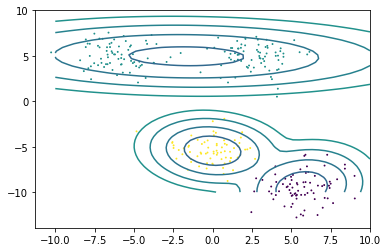

In [247]:
from matplotlib.colors import LogNorm

x = np.linspace(-10., 10.)
y = np.linspace(-10., 10.)
X_, Y_ = np.meshgrid(x, y)
XX = np.array([X_.ravel(), Y_.ravel()]).T
Z_ = -gauss.score_samples(XX)
Z = Z_.reshape(X_.shape)

CS = plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 1, 10))
plt.scatter(X[:, 0], X[:, 1], 0.8, c=labels);

In [248]:
gauss = GaussianMixture(n_components=4, random_state=10).fit(X)

In [249]:
labels = gauss.predict(X)

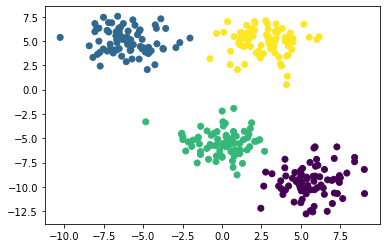

In [250]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

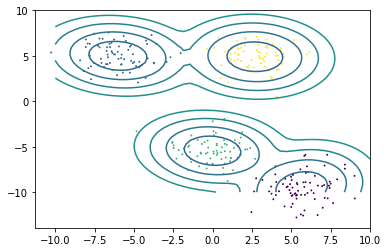

In [251]:
from matplotlib.colors import LogNorm

x = np.linspace(-10., 10.)
y = np.linspace(-10., 10.)
X_, Y_ = np.meshgrid(x, y)
XX = np.array([X_.ravel(), Y_.ravel()]).T
Z_ = -gauss.score_samples(XX)
Z = Z_.reshape(X_.shape)

CS = plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 1, 10))
plt.scatter(X[:, 0], X[:, 1], 0.8, c=labels);

### Different forms 

In [252]:
def gaussian_clustering(n_clusters, X):
    gauss = GaussianMixture(n_components=n_clusters, random_state=10).fit(X)
    labels = gauss.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels);
    
    plt.title(str(n_clusters) + ' clusters')
    plt.show()

### two moons 

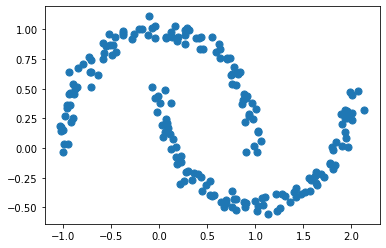

In [253]:
X, y = make_moons(200, noise=0.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

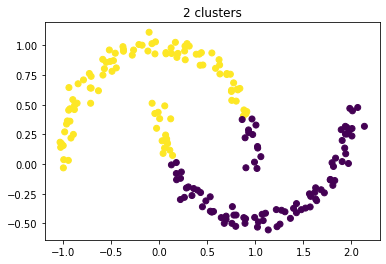

In [254]:
gaussian_clustering(2, X)

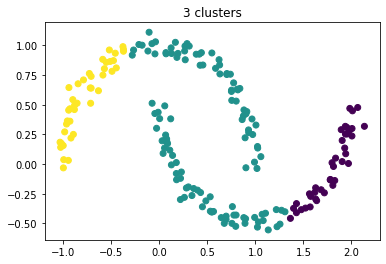

In [255]:
gaussian_clustering(3, X)

### two circles 

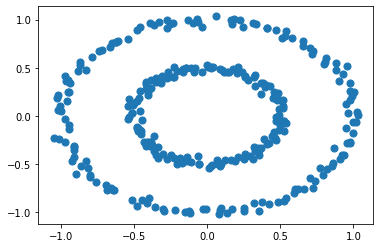

In [256]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

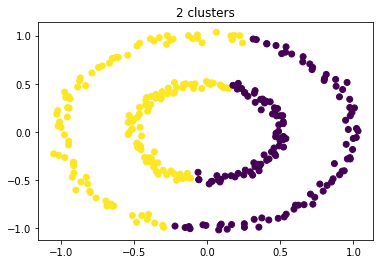

In [257]:
gaussian_clustering(2, X)

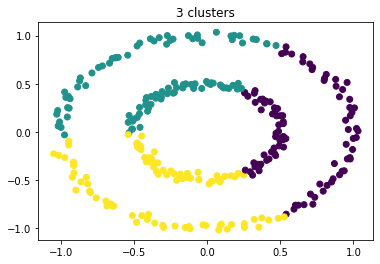

In [258]:
gaussian_clustering(3, X)

### Anisotropicly distributed 

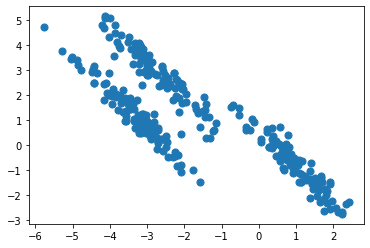

In [259]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.608, -0.637], [-0.409, 0.852]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

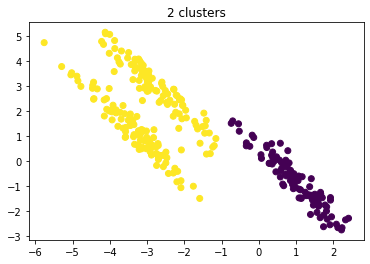

In [260]:
gaussian_clustering(2, X)

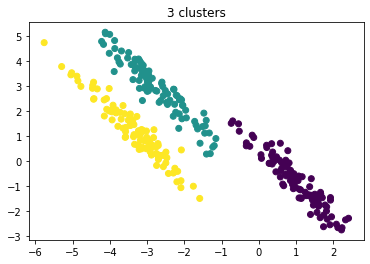

In [261]:
gaussian_clustering(3, X)

# Clusterization on real kaggle data

https://www.kaggle.com/unsdsn/world-happiness

In [262]:
data = pd.read_csv('data/2019.csv')

In [263]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [264]:
data.shape

(156, 9)

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [266]:
data['Overall rank'].nunique()

156

In [267]:
data.drop('Overall rank', axis=1, inplace=True)

In [268]:
data['Country or region'].nunique()

156

In [269]:
country = data['Country or region']

In [270]:
data.drop('Country or region', axis=1, inplace=True)

In [271]:
data.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


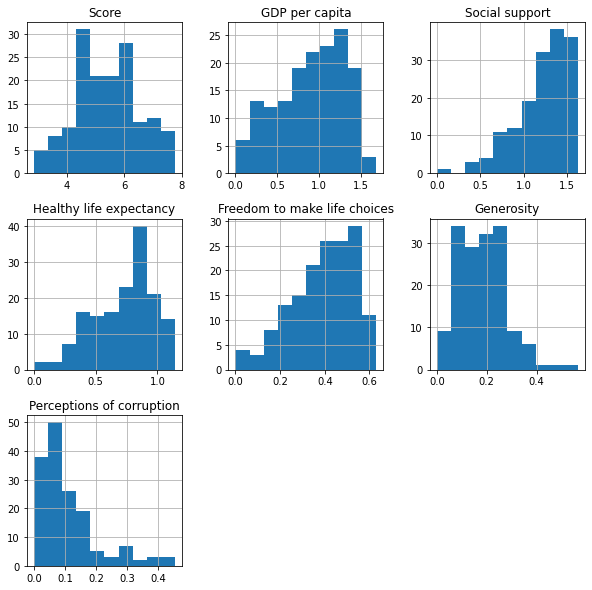

In [272]:
data.hist(figsize=(10, 10));

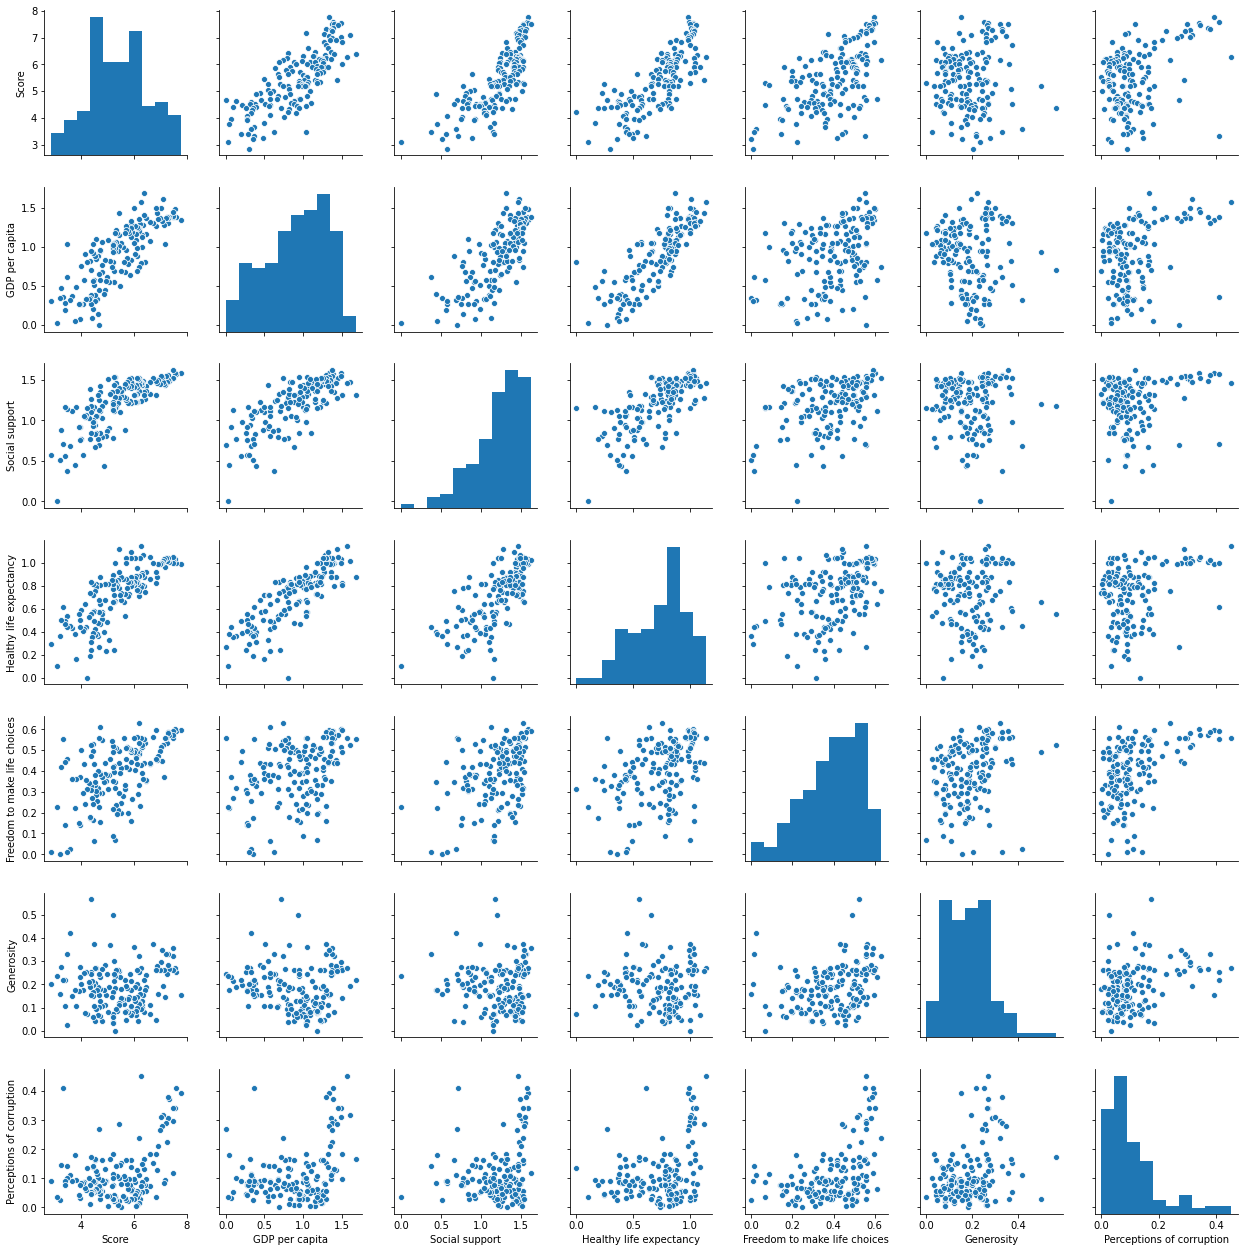

In [273]:
sns.pairplot(data)

### Correlation  

In [274]:
corr = data.corr()

In [275]:
mask = np.triu(np.ones_like(corr, dtype=bool))

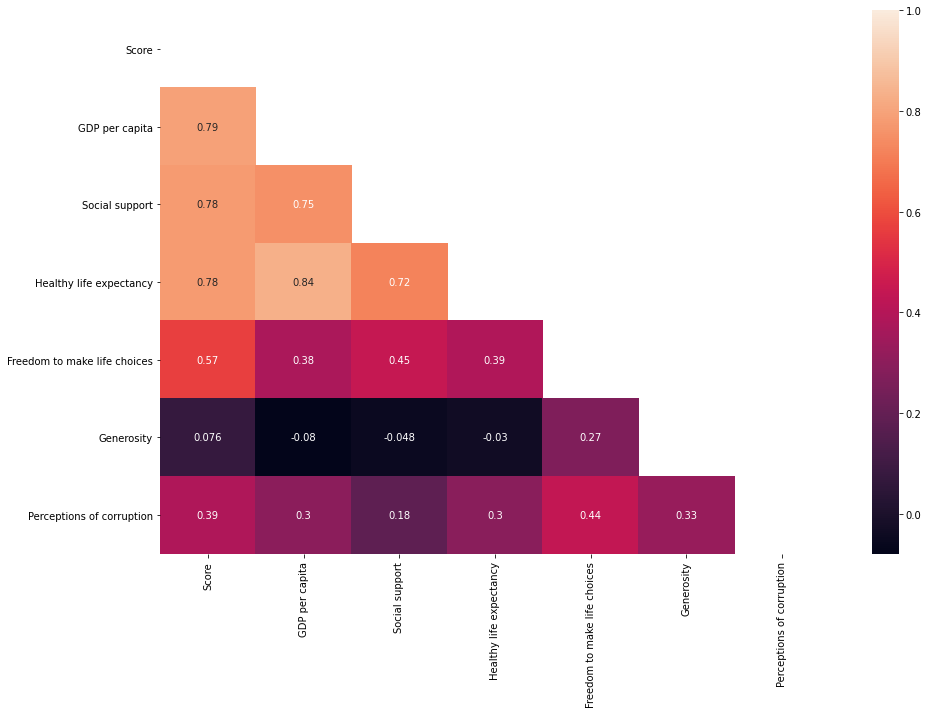

In [276]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True)

### Normalization  

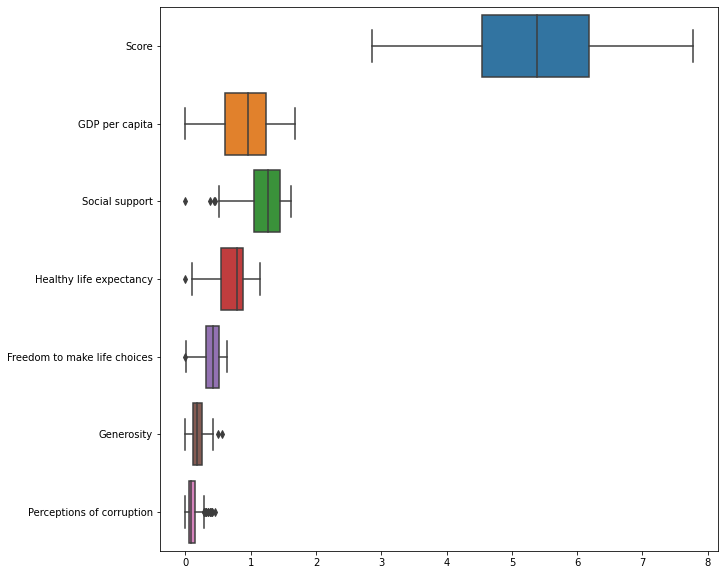

In [277]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, orient='h');

In [278]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [279]:
scaler = MinMaxScaler()

In [280]:
X_scaled = scaler.fit_transform(data)

In [281]:
data_scaled = pd.DataFrame(X_scaled, columns = data.columns)

In [282]:
data_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


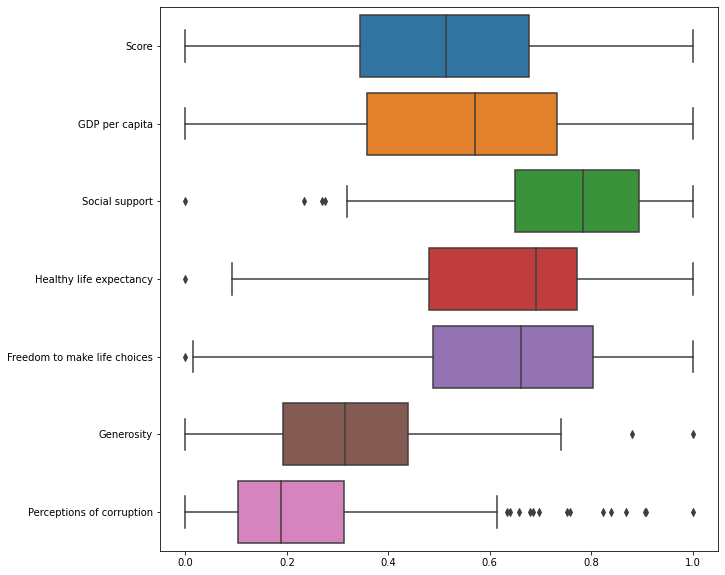

In [283]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_scaled, orient='h');

### Dimensionality reduction for visualization  

In [284]:
from sklearn.manifold import TSNE

In [285]:
tsne = TSNE(n_components=2, random_state=10)

In [286]:
X_tsne = tsne.fit_transform(X_scaled)

In [287]:
X_tsne.shape

(156, 2)

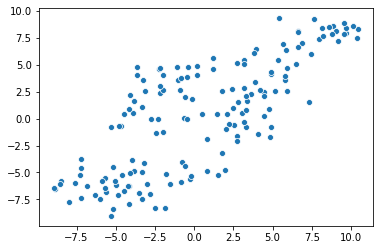

In [288]:
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1]);

## Clusterization 


### KMeans

In [289]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_jobs=-1).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

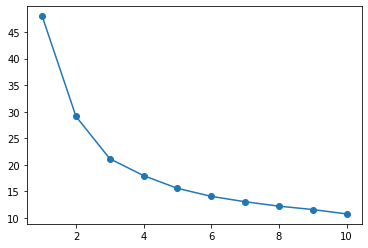

In [290]:
plt.plot(range(1, 11), inertia, marker='o')

In [291]:
D = []

for i in range(1, 9):
    D_i = (inertia[i]-inertia[i+1])/(inertia[i-1]-inertia[i+1])

    D.append(D_i)

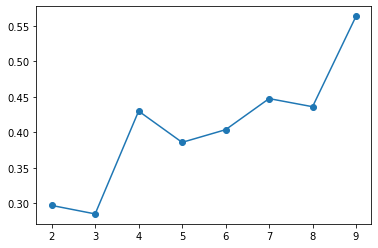

In [292]:
plt.plot(range(2, 10), D, marker='o');

Min value is 3

### 3 clusters 

In [293]:
kmeans = KMeans(n_clusters=3, random_state=10, n_jobs=-1).fit(X_scaled)
labels = kmeans.labels_

In [294]:
centers = kmeans.cluster_centers_

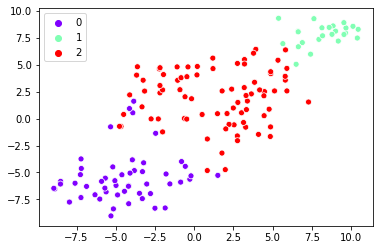

In [295]:
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=labels, palette='rainbow');

In [296]:
data['labels'] = labels

In [297]:
data.tail()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,labels
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0
155,2.853,0.306,0.575,0.295,0.010,0.202,0.091,0


In [298]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.333333
1    0.153846
2    0.512821
Name: labels, dtype: float64

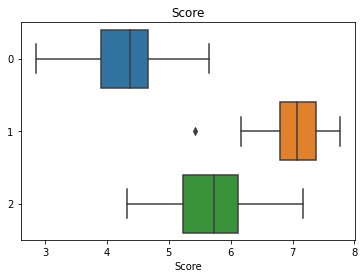

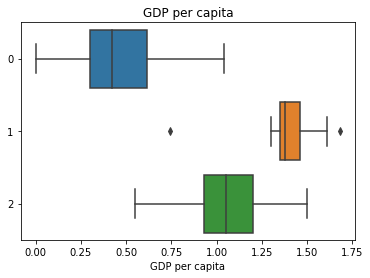

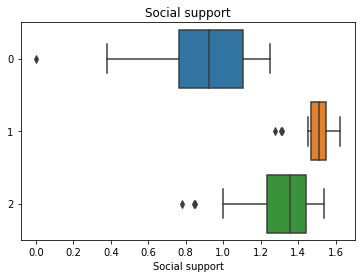

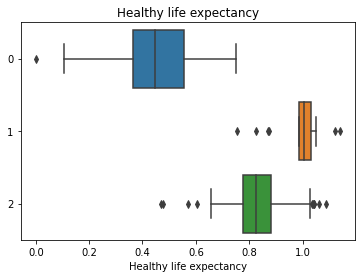

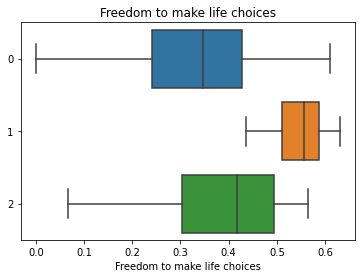

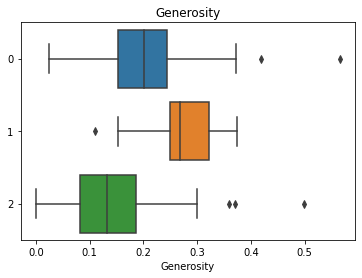

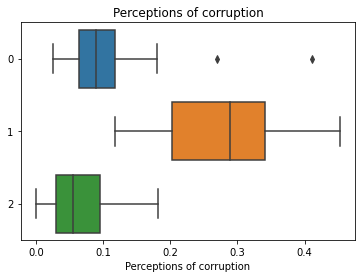

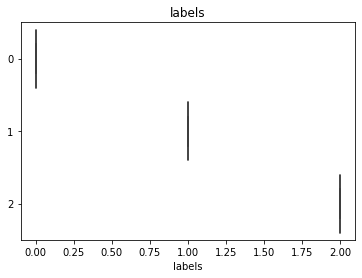

In [299]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [300]:
data.groupby('labels').median().T.round(2)

labels,0,1,2
Score,4.38,7.07,5.73
GDP per capita,0.42,1.38,1.05
Social support,0.92,1.51,1.36
Healthy life expectancy,0.45,1.00,0.83
Freedom to make life choices,0.35,0.56,0.42
Generosity,0.20,0.27,0.13
Perceptions of corruption,0.09,0.29,0.06


In [301]:
country_df = pd.DataFrame(country)

In [302]:
country_df['labels'] = labels

In [305]:
country_df.sample(15).sort_values('labels')

,Country or region,labels
121,Mauritania,0
149,Malawi,0
98,Ivory Coast,0
152,Tanzania,0
75,Hong Kong,1
19,Czech Republic,2
24,Taiwan,2
22,Mexico,2
48,Cyprus,2
56,Mauritius,2


In [306]:
country_df[country_df['Country or region'] == 'Russia']

,Country or region,labels
67,Russia,2


### 4 clusters 

In [307]:
kmeans = KMeans(n_clusters=4, random_state=10, n_jobs=-1).fit(X_scaled)
labels = kmeans.labels_

In [308]:
centers = kmeans.cluster_centers_

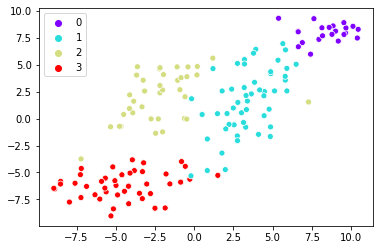

In [309]:
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=labels, palette='rainbow');

In [310]:
data['labels'] = labels
data.tail()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,labels
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3
155,2.853,0.306,0.575,0.295,0.010,0.202,0.091,3


In [311]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.141026
1    0.333333
2    0.237179
3    0.288462
Name: labels, dtype: float64

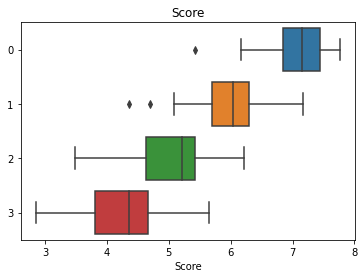

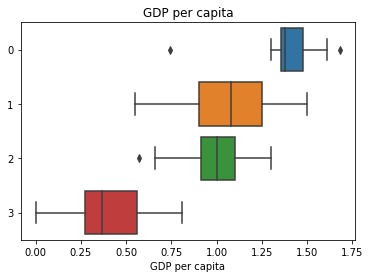

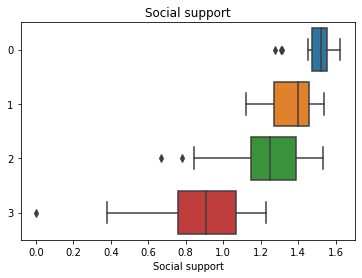

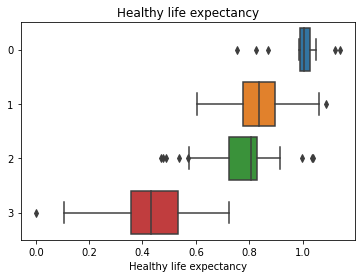

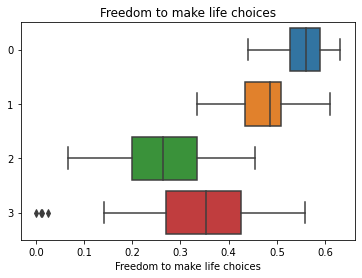

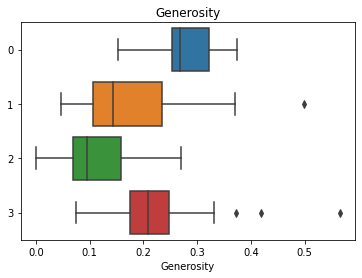

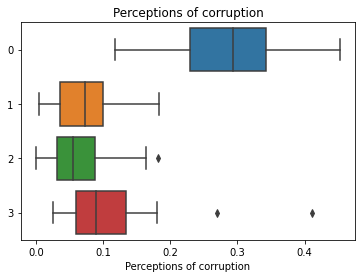

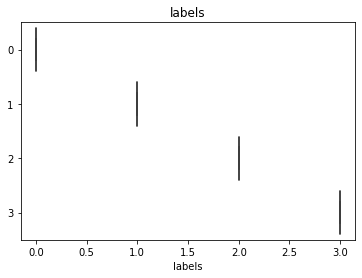

In [312]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [313]:
country_df = pd.DataFrame(country)
country_df['labels'] = labels
country_df.sample(15).sort_values('labels')

,Country or region,labels
28,Qatar,0
9,Austria,0
24,Taiwan,1
19,Czech Republic,1
88,Morocco,2
70,Moldova,2
107,Venezuela,2
132,Ukraine,2
41,Lithuania,2
114,Burkina Faso,3


In [314]:
country_df[country_df['Country or region'] == 'Russia']

,Country or region,labels
67,Russia,2


# EM algorithm

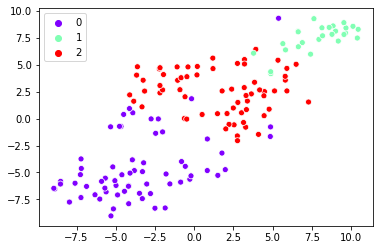

In [315]:
gauss = GaussianMixture(n_components=3, random_state=10).fit(X_scaled)
labels = gauss.predict(X_scaled)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=labels, palette='rainbow');


In [316]:
data['labels'] = labels
data.tail()


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,labels
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0
155,2.853,0.306,0.575,0.295,0.010,0.202,0.091,0


In [317]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.416667
1    0.166667
2    0.416667
Name: labels, dtype: float64

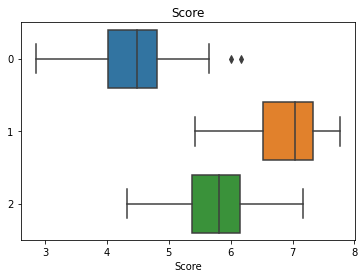

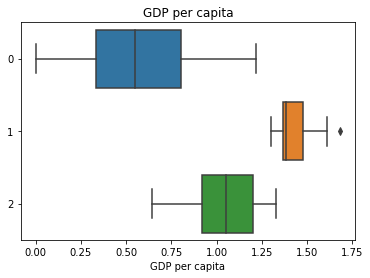

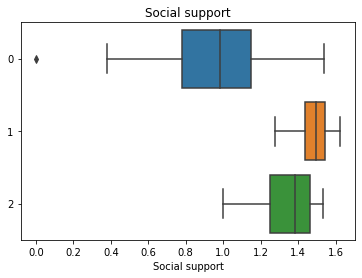

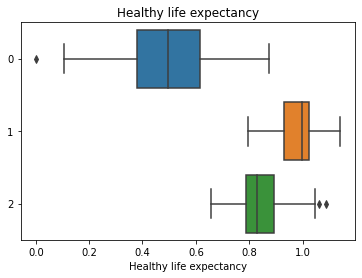

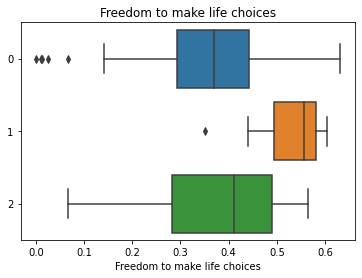

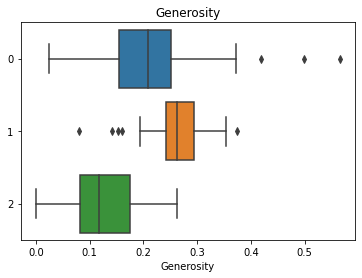

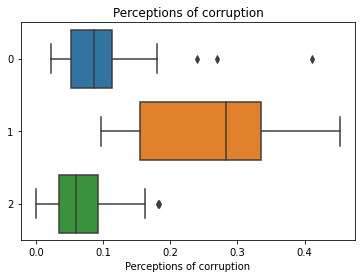

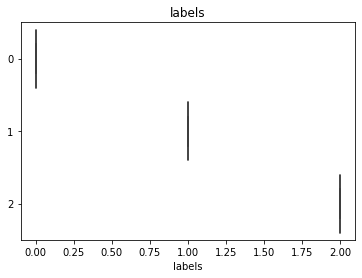

In [318]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [319]:
country_df = pd.DataFrame(country)
country_df['labels'] = labels
country_df.sample(15).sort_values('labels')

,Country or region,labels
114,Burkina Faso,0
120,Kenya,0
119,Gambia,0
150,Yemen,0
131,Chad,0
104,Laos,0
143,Lesotho,0
73,Tajikistan,0
144,Burundi,0
129,Sri Lanka,0


In [320]:
country_df[country_df['Country or region'] == 'Russia']

,Country or region,labels
67,Russia,2
